# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, ReLU
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Combining files

In [3]:
# Load the datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2018.csv').values
dataset2 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2019.csv').values
dataset3 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2020.csv').values
dataset4 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2021.csv').values
dataset5 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2022.csv').values
dataset6 = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/2023.csv').values


In [ ]:
dataset1

array([['01-01-2018 00:00', 80.423, 18.16, 174.542804],
       ['01-01-2018 00:15', 81.471, 18.064, 175.981604],
       ['01-01-2018 00:30', 82.675, 17.927, 178.636804],
       ...,
       ['31-12-2018 23:15', 61.66634545, 17.689, 181.6006],
       ['31-12-2018 23:30', 60.73270909, 17.818, 183.150424],
       ['31-12-2018 23:45', 60.94089091, 17.827, 183.731516]],
      dtype=object)

In [4]:
# Combine the datasets into a single array
combined_data = np.concatenate((dataset1, dataset2, dataset3,dataset4,dataset5,dataset6), axis=0)

# Save the combined data as an npy file
np.save('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyears.npy', combined_data)

In [ ]:
# Convert the combined_data array to a pandas DataFrame
combined_data = pd.DataFrame(combined_data, columns=['DateTime', 'RH', 'Temp', 'Load'])  # Replace 'Column1', 'Column2', ... with your actual column names

# Save the combined DataFrame to a CSV file
combined_data.to_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyears.csv', index=False)




# Checking missing rows

In [ ]:
data_r.tail()

,DateTime,RH,Temp,Load
195548,30-07-2023 23:00,91.78,27.74,298.124610
195549,30-07-2023 23:15,92.10,27.66,295.327468
195550,30-07-2023 23:30,92.42,27.62,291.813111
195551,30-07-2023 23:45,92.32,27.64,288.324763
195552,31-07-2023 00:00,92.10,27.66,283.986463


In [ ]:
import pandas as pd

# Read the data from the CSV file
data_r = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyears.csv')

# Convert 'DateTime' column to datetime format
data_r['DateTime'] = pd.to_datetime(data_r['DateTime'], format='%d-%m-%Y %H:%M')

# Set 'DateTime' as the index
data_r.set_index('DateTime', inplace=True)

# Define the expected frequency (15 minutes)
expected_freq = pd.Timedelta(minutes=15)

# Generate the expected datetime range
expected_range = pd.date_range(start=data_r.index.min(), end=data_r.index.max(), freq=expected_freq)

# Find the missing rows
missing_rows = expected_range[~expected_range.isin(data_r.index)]

# Print the missing rows
print("Missing rows:")
for row in missing_rows:
    print(row)

ValueError: ignored

# Data preparation

In [5]:
data = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyears.csv')

In [6]:
data.shape

(195553, 4)

In [ ]:
data

,DateTime,RH,Temp,Load
0,01-01-2018 00:00,80.423,18.160,174.542804
1,01-01-2018 00:15,81.471,18.064,175.981604
2,01-01-2018 00:30,82.675,17.927,178.636804
3,01-01-2018 00:45,84.552,17.745,180.045604
4,01-01-2018 01:00,86.663,17.751,182.254000
...,...,...,...,...
195548,30-07-2023 23:00,91.780,27.740,298.124610
195549,30-07-2023 23:15,92.100,27.660,295.327468
195550,30-07-2023 23:30,92.420,27.620,291.813111
195551,30-07-2023 23:45,92.320,27.640,288.324763


In [ ]:
# data = np.delete(data, 0, axis=1)
# # data = np.delete(data, 1, axis=1)
# # data = np.delete(data, 3, axis=1)

In [7]:
# Specify the columns you want to delete
columns_to_delete = ['DateTime', 'Temp', 'Load']  # Replace with the actual column names you want to delete

# Drop the specified columns
data.drop(columns=columns_to_delete, inplace=True)

In [8]:
data.head()

,RH
0,80.423
1,81.471
2,82.675
3,84.552
4,86.663


In [9]:
data.to_csv("/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyearsRH.csv",index=False)

In [13]:
RH_data = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyearsRH.csv')


In [14]:
RH_data.shape

(195553, 1)

In [15]:
RH_data

,RH
0,80.423
1,81.471
2,82.675
3,84.552
4,86.663
...,...
195548,91.780
195549,92.100
195550,92.420
195551,92.320


# Preprocessing

In [16]:
import pandas as pd

In [20]:
RH_data = pd.read_csv('/content/drive/MyDrive/IMD-TP Load Forecast/Updated Yearly Data/allyearsRH.csv')

In [21]:
RH_data.shape

(195553, 1)

In [22]:
RH_data

,RH
0,80.423
1,81.471
2,82.675
3,84.552
4,86.663
...,...
195548,91.780
195549,92.100
195550,92.420
195551,92.320


In [23]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(RH_data)

In [24]:
scaled_data

array([[0.54983716],
       [0.55858873],
       [0.56864301],
       ...,
       [0.65002088],
       [0.6491858 ],
       [0.64734864]])

In [25]:
scaled_data.shape

(195553, 1)

In [26]:
# Preprocess the data
n_steps_in = 96 * 7  # Number of steps to take as input
n_steps_out = 96  # Number of steps to predict


# Reshape the data into input and target sequences
X, y = [], []
for i in range(n_steps_in, len(scaled_data) - 192):
    X.append(scaled_data[i - n_steps_in:i])
    y.append(scaled_data[i:i + 192])  # Extract the first column of the target data

X = np.array(X)
y = np.array(y)
y = y.reshape(y.shape[0],y.shape[1]*y.shape[2])

In [27]:
split_index = int(0.80 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [28]:
len(scaled_data)

195553

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(155751, 672, 1)
(38938, 672, 1)
(155751, 192)
(38938, 192)


# Denormalizing

In [ ]:
# Denormalising or Rescaling
tempy = []
for i in range(672 ,temp_data.shape[0] - 192):
  tempy.append(temp_data[i:i+192])
tempy = np.array(tempy)
y_train_og, y_test_og = train_test_split(tempy,test_size=0.2,shuffle=False)

In [ ]:
y_train_og.shape

(83481, 192, 1)

In [ ]:
y_test_og.shape

(20871, 192, 1)

In [ ]:
tempy.shape

(104352, 192, 1)

In [ ]:
y_test_og = y_test_og.reshape(y_test_og.shape[0],y_test_og.shape[1],y_test_og.shape[2])
y_test_og.shape

(20871, 192, 1)

In [ ]:
tempy=tempy.reshape(tempy.shape[0],tempy.shape[1]*tempy.shape[2])
tempy.shape

(104352, 192)

In [ ]:
# y_test_og = y_test_og.reshape(y_test_og.shape[0],y_test_og.shape[1],y_test_og.shape[2])
# tempy=tempy.reshape(tempy.shape[0],tempy.shape[1]*tempy.shape[2])
scalery = MinMaxScaler()
models=scalery.fit(tempy)
sc_data=models.transform(tempy)

# ANN optuna

In [ ]:
%pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
def create_model(trial):

  # Create the ANN model
  model = Sequential()
  model.add(Dense(units=(trial.suggest_int('ann_1_units',y_train.shape[1], X_train.shape[1])), activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(units=(trial.suggest_int('ann_2_units',y_train.shape[1], X_train.shape[1])),activation='relu'))
  model.add(Dense(units=(trial.suggest_int('ann_3_units',y_train.shape[1], X_train.shape[1])),activation='relu'))
  # ann.add(tf.keras.layers.Dense(units=(trial.suggest_int('ann_2_units',y_train.shape[1], X_train.shape[1])),activation="relu"))
  model.add(tf.keras.layers.Dense(y_train.shape[1], activation='tanh'))

  # Compile the model
  optimizer_name = trial.suggest_categorical("optimizer", ["adam", "SGD", "RMSprop", "Adadelta"])
  # optimizer = tf.keras.optimizers.Adam(learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True))
  # model.compile(optimizer=optimizer_name, loss='mse', metrics=['mse'])
  model.compile(optimizer=optimizer_name, loss="binary_crossentropy",metrics=['accuracy'])

  return model

def objective(trial):
    model = create_model(trial)
    epochs = trial.suggest_int("epochs", 5, 50,step=5, log=False)
    batchsize = trial.suggest_int("batchsize", 5, 50,step=5, log=False)

    # Train the model
    model.fit(X_train, y_train, batch_size=batchsize, epochs=epochs)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    return scores[1]

study = optuna.create_study()
study.optimize(objective, n_trials=5)

print(study.best_params)

[I 2023-11-13 15:58:45,761] A new study created in memory with name: no-name-82d3f2b7-619b-4512-81f4-149d8ffb6a60


Epoch 1/45
 841/3462 [======>.......................] - ETA: 1:57 - loss: 3.9568 - accuracy: 0.0068

[W 2023-11-13 15:59:29,966] Trial 0 failed with parameters: {'ann_1_units': 564, 'ann_2_units': 625, 'ann_3_units': 549, 'optimizer': 'Adadelta', 'epochs': 45, 'batchsize': 45} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-41-5382924714aa>", line 25, in objective
    model.fit(X_train, y_train, batch_size=batchsize, epochs=epochs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1783, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/

KeyboardInterrupt: ignored

# ANN model building

In [30]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=355, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(units=584, activation='tanh'))
model.add(Dense(units=244, activation='tanh'))
model.add(Dense(units=y_train.shape[1], activation='tanh'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=15, validation_split=0.2,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 355)               238915    
                                                                 
 dense_1 (Dense)             (None, 584)               207904    
                                                                 
 dense_2 (Dense)             (None, 244)               142740    
                                                                 
 dense_3 (Dense)             (None, 192)               47040     
                                                                 
Total params: 636,599
Trainable params: 636,599
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8307/8307 [==============================] - 116s 14ms/step - loss: 0.0061 - val_loss: 0.0188
Epoch 2/10
8307/8307 [==============================] - 109s 13ms/step - loss

In [32]:
import numpy as np
from keras.models import load_model
model = load_model("/content/drive/MyDrive/IMD-TP Load Forecast/Models srushti/ANN_RH.h5")

In [33]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

1217/1217 [==============================] - 5s 4ms/step - loss: 0.0267
Mean Squared Error: 0.026713350787758827


In [34]:
# Assuming y_pred is the predicted values from your model
y_pred = model.predict(X_test)

1217/1217 [==============================] - 4s 3ms/step


In [35]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 23.23051233871046


In [36]:
from scipy.stats import pearsonr

In [37]:
# # Calculate Pearson correlation coefficient (KPCC)
# kpcc = np.corrcoef(y_test, y_pred)[0, 1]
kpcc = pearsonr(y_pred.flatten(), y_test.flatten())
print("Pearson Correlation Coefficient (KPCC):", kpcc)

Pearson Correlation Coefficient (KPCC): PearsonRResult(statistic=0.7043646692412247, pvalue=0.0)


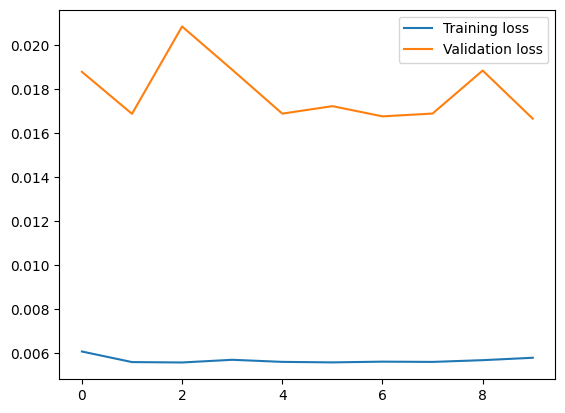

In [38]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Model saving

In [31]:
model.save('/content/drive/MyDrive/IMD-TP Load Forecast/Models srushti/ANN_RH.h5')

# Predictions

In [ ]:
model = load_model('/content/drive/MyDrive/IMD-TP Load Forecast/ANN/temp_181920_192.h5')

In [ ]:
X_test.shape

(20871, 672, 1)

In [ ]:
pred = model.predict(X_test[0:672])
pred

21/21 [==============================] - 0s 3ms/step


array([[0.72559404, 0.7004154 , 0.74487334, ..., 0.75030094, 0.78293574,
        0.74245673],
       [0.72437257, 0.697163  , 0.74238455, ..., 0.75017196, 0.7815018 ,
        0.741519  ],
       [0.7243328 , 0.6934707 , 0.7395956 , ..., 0.749101  , 0.77895224,
        0.7407153 ],
       ...,
       [0.73226047, 0.7058009 , 0.749589  , ..., 0.7580663 , 0.7780615 ,
        0.7371421 ],
       [0.73212415, 0.7025322 , 0.74515104, ..., 0.7583265 , 0.7763042 ,
        0.73644257],
       [0.7323661 , 0.7003979 , 0.7447001 , ..., 0.75798404, 0.7758009 ,
        0.73345894]], dtype=float32)

In [ ]:
len(pred)

672

In [ ]:
pred.shape

(672, 192)

In [ ]:
pred = pd.DataFrame(pred)
pred

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.725594,0.700415,0.744873,0.753347,0.734485,0.748762,0.728099,0.727221,0.728668,0.732814,...,0.759239,0.775252,0.788175,0.768791,0.744434,0.749673,0.741191,0.750301,0.782936,0.742457
1,0.724373,0.697163,0.742385,0.752454,0.731772,0.748416,0.726138,0.725172,0.726183,0.729608,...,0.755863,0.773304,0.786849,0.767049,0.743847,0.749227,0.737762,0.750172,0.781502,0.741519
2,0.724333,0.693471,0.739596,0.752254,0.728579,0.747158,0.724462,0.723649,0.724046,0.726479,...,0.752926,0.770731,0.783551,0.765793,0.742420,0.749164,0.733824,0.749101,0.778952,0.740715
3,0.723860,0.690252,0.738020,0.751263,0.726785,0.746155,0.721525,0.721282,0.722679,0.723921,...,0.749010,0.767130,0.780838,0.763421,0.741024,0.749592,0.730082,0.748975,0.776191,0.739077
4,0.723962,0.687826,0.736247,0.751265,0.725026,0.745918,0.719943,0.719172,0.720728,0.721639,...,0.744967,0.763956,0.776389,0.760244,0.738907,0.749943,0.727261,0.749266,0.773779,0.738560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.732858,0.715129,0.753983,0.749751,0.745152,0.743478,0.735021,0.733338,0.736766,0.740036,...,0.768298,0.768069,0.778177,0.769408,0.756566,0.744432,0.748939,0.758511,0.775975,0.738251
668,0.732931,0.709839,0.750778,0.751426,0.741876,0.741792,0.733310,0.732179,0.733084,0.734029,...,0.768848,0.769276,0.777248,0.767878,0.755423,0.740434,0.743705,0.760573,0.775134,0.738899
669,0.732260,0.705801,0.749589,0.751830,0.740444,0.742328,0.729557,0.725922,0.730166,0.731946,...,0.765595,0.768053,0.777075,0.765432,0.755317,0.740892,0.742529,0.758066,0.778062,0.737142
670,0.732124,0.702532,0.745151,0.752219,0.737420,0.743013,0.729199,0.725167,0.726221,0.729143,...,0.762953,0.769773,0.776226,0.764154,0.752742,0.739205,0.738874,0.758326,0.776304,0.736443


In [ ]:
from scipy.stats import pearsonr
kpcc = pearsonr(pred.flatten(), y_test.flatten())
kpcc

AttributeError: ignored

In [ ]:
y_test.flatten().shape

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
mape = mean_absolute_percentage_error(y_test, pred)
mape

In [ ]:
rmse = mean_squared_error(y_test, pred, squared=False)
rmse

# Denormalizing predictions

In [ ]:
pred_original = scalery.inverse_transform(pred)
pred_original
# tempy_inverse = tempy_inverse.reshape(tempy_inverse.shape[0], 96, 1)
# predictions = np.reshape(predictions, (predictions.shape[0], 7, input.shape[2]))
# pred_original

NameError: ignored

# LSTM

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(214, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
modelLSTM.add(LSTM(142, return_sequences=True, activation='tanh'))
modelLSTM.add(LSTM(64, return_sequences=False, activation='tanh'))
modelLSTM.add(Dense(y_train.shape[1], activation='tanh'))
modelLSTM.compile(optimizer='adam',loss='mse',metrics=['mse'])
modelLSTM.summary()
# Train the model
history = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 672, 214)          184896    
                                                                 
 lstm_1 (LSTM)               (None, 672, 142)          202776    
                                                                 
 lstm_2 (LSTM)               (None, 64)                52992     
                                                                 
 dense_8 (Dense)             (None, 192)               12480     
                                                                 
Total params: 453144 (1.73 MB)
Trainable params: 453144 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
  41/3894 [..............................] - ETA: 5:16:27 - loss: 0.0664 - mse: 0.0664

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model
loss = modelLSTM.evaluate(X_test, y_test)
print("Test loss:", loss)

KeyError: ignored

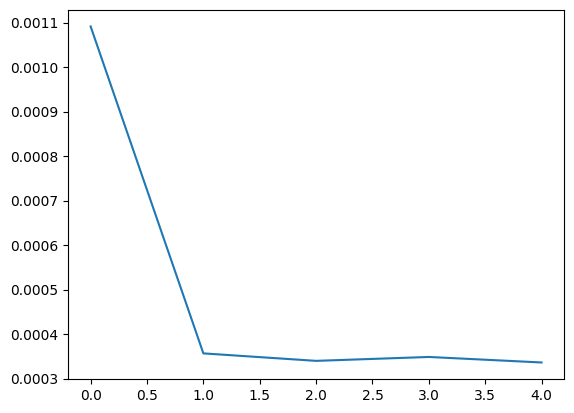

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Multi output model

In [ ]:
# Build the multi-output model
input_layer = Input(shape=(2,))
hidden_layer = Dense(64, activation='relu')(input_layer)
output1 = Dense(1, name='output1')(hidden_layer)  # Temperature prediction
output2 = Dense(1, name='output2')(hidden_layer)  # Humidity prediction
output3 = Dense(1, name='output3')(hidden_layer)  # Load prediction

model = Model(inputs=input_layer, outputs=[output1, output2, output3])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, [y_train_scaled, y_train_scaled, y_train_scaled],
          validation_data=(X_test_scaled, [y_test_scaled, y_test_scaled, y_test_scaled]),
          epochs=5, batch_size=32)

# # Predict on test data
# predictions = model.predict(X_test_scaled)

# # Rescale the predictions back to the original scale
# predictions_rescaled = [scaler.inverse_transform(pred.reshape(-1, 1)).flatten() for pred in predictions]

# # Print the predicted values
# for i, pred in enumerate(predictions_rescaled):
#     print(f"Prediction for sample {i+1}: Temperature={pred[0]}, Humidity={pred[1]}, Load={pred[2]}")


Epoch 1/5
3153/3153 [==============================] - 13s 4ms/step - loss: 0.0653 - output1_loss: 0.0221 - output2_loss: 0.0210 - output3_loss: 0.0223 - val_loss: 0.0583 - val_output1_loss: 0.0195 - val_output2_loss: 0.0195 - val_output3_loss: 0.0194
Epoch 2/5
3153/3153 [==============================] - 13s 4ms/step - loss: 0.0571 - output1_loss: 0.0191 - output2_loss: 0.0190 - output3_loss: 0.0191 - val_loss: 0.0576 - val_output1_loss: 0.0192 - val_output2_loss: 0.0192 - val_output3_loss: 0.0192
Epoch 3/5
3153/3153 [==============================] - 9s 3ms/step - loss: 0.0570 - output1_loss: 0.0190 - output2_loss: 0.0190 - output3_loss: 0.0190 - val_loss: 0.0567 - val_output1_loss: 0.0189 - val_output2_loss: 0.0189 - val_output3_loss: 0.0189
Epoch 4/5
3153/3153 [==============================] - 12s 4ms/step - loss: 0.0566 - output1_loss: 0.0189 - output2_loss: 0.0189 - output3_loss: 0.0189 - val_loss: 0.0560 - val_output1_loss: 0.0186 - val_output2_loss: 0.0186 - val_output3_loss: 

In [ ]:
# Evaluate the performance of the DNN model
mse = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error:", mse)

1051/1051 [==============================] - 2s 2ms/step - loss: 0.0560 - output1_loss: 0.0187 - output2_loss: 0.0188 - output3_loss: 0.0186
Mean Squared Error: [0.05604485794901848, 0.018656382337212563, 0.01875092089176178, 0.018637558445334435]


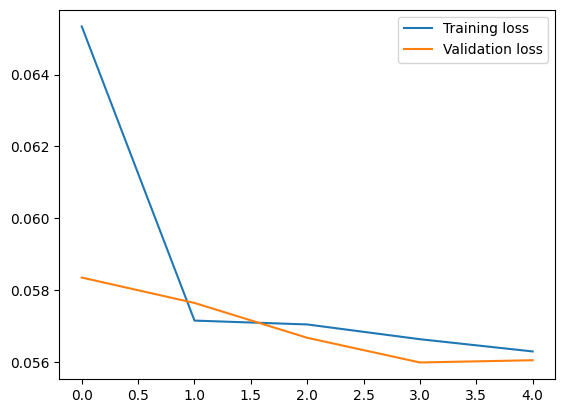

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
X_train_scaled.shape

(23424, 2)